# Задача 1

###### Даны значения зарплат из выборки выпускников: 
###### 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

###### Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

###### Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [12]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt

In [2]:
list_salary = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [68]:
my_mean = sum(list_salary) / len(list_salary)
df = DataFrame (list_salary,columns=['Salary'])
print(f"Cреднее арифметическое = {my_mean}, \nРассчитанное функцией = {df['Salary'].mean()}")

Cреднее арифметическое = 65.3, 
Рассчитанное функцией = 65.3


In [67]:
salary_std = np.sqrt(((df['Salary'] - df['Salary'].mean()) ** 2).sum() / df['Salary'].count())
salary_std
print(f"Cреднее квадратичное отклонение = {salary_std}, \nРассчитанное функцией = {df['Salary'].std(ddof=0)} ")

среднее квадратичное отклонение = 30.823854398825596, 
Рассчитанное функцией = 30.823854398825596 


In [90]:
salary_variance = ((df['Salary'] - df['Salary'].mean()) ** 2).sum() / df['Salary'].count()
salary_variance2 = ((df['Salary'] - df['Salary'].mean())**2).sum() / (df['Salary'].count() - 1)
print(f"По формуле: \nСмещенная оценка дисперсии - {salary_variance}, \nНесмещенная оценка дисперсии - {salary_variance2}")
print(f"С помощью метода:\nСмещенная оценка дисперсии - {df['Salary'].var(ddof=0)}, \nНесмещенная оценка дисперсии - {df['Salary'].var(ddof=1)}")

По формуле: 
Смещенная оценка дисперсии - 950.11, 
Несмещенная оценка дисперсии - 1000.1157894736842
С помощью метода:
Смещенная оценка дисперсии - 950.11, 
Несмещенная оценка дисперсии - 1000.1157894736842


### Задача 2

###### Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

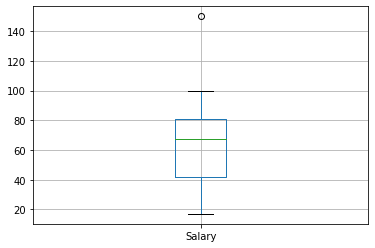

In [92]:
df[['Salary']].boxplot()

In [93]:
q_1 = df['Salary'].quantile(0.25)
q_3 = df['Salary'].quantile(0.75)
iqr = q_3 - q_1

boxplot_range = (q_1 - 1.5 * iqr, q_3 + 1.5 * iqr)

outliers = df.loc[(df['Salary'] < boxplot_range[0]) | (df['Salary'] > boxplot_range[1])]
print(f'Первый квартиль: {q_1}')
print(f'Трейтий квартиль: {q_3}')
print(f'Интерквартильное расстояние: {iqr}')
print("Выбросы:")
outliers

Первый квартиль: 42.0
Трейтий квартиль: 81.0
Интерквартильное расстояние: 39.0
Выбросы:


,Salary
19,150


### Задача 3

###### В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

A + B = C 
Значит вероятность того, что студент учится на факультете:


In [108]:
A = 0.25
B = 0.25
C = 0.5

Вероятность сдачи для каждого студента:

In [109]:
P_a = 0.8
P_b = 0.7
P_c = 0.9

Формула Байеса

P(B|A)=P(B)⋅P(A|B)/P(A)

По формуле полной вероятности:


In [110]:
P = 0.25 * 0.8 + 0.25 * 0.7 + 0.5 * 0.9
P

0.825

In [112]:
A_res = P_a * A / P
print(f'Вероятность, что студент учится на факультете A: {A_res}')
B_res = P_b * B / P
print(f'Вероятность, что студент учится на факультете A: {B_res}')
C_res = P_c * C / P
print(f'Вероятность, что студент учится на факультете A: {C_res}')
print(A + B + C)

Вероятность, что студент учится на факультете A: 0.24242424242424246
Вероятность, что студент учится на факультете A: 0.21212121212121213
Вероятность, что студент учится на факультете A: 0.5454545454545455
1.0
